In [135]:
import pandas as pd
import numpy as np

#To ignore the future warning all warnings has been checked already.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [82]:
#Display maximum results
pd.set_option('display.max_rows', 500)

In [83]:
TrainData = pd.read_csv("/Users/ganesh_dhasade/Documents/kaggle/House_price_prediction_Regression_Problem/house-prices-advanced-regression-techniques/train.csv")


In [84]:
TrainData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,PoolQC_NA,Fence_NA,MisFeature_NA,0,2,YrSold_2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,PoolQC_NA,Fence_NA,MisFeature_NA,0,5,YrSold_2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,PoolQC_NA,Fence_NA,MisFeature_NA,0,9,YrSold_2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,PoolQC_NA,Fence_NA,MisFeature_NA,0,2,YrSold_2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,PoolQC_NA,Fence_NA,MisFeature_NA,0,12,YrSold_2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,PoolQC_NA,Fence_NA,MisFeature_NA,0,8,YrSold_2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,PoolQC_NA,Fence_MnPrv,MisFeature_NA,0,2,YrSold_2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,PoolQC_NA,Fence_GdPrv,MisFeature_Shed,2500,5,YrSold_2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,PoolQC_NA,Fence_NA,MisFeature_NA,0,4,YrSold_2010,WD,Normal,142125


In [85]:
#Summarize the dataset
TrainData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000


In [86]:
TrainData.isna().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [92]:
MasterDataFrame = TrainData

In [93]:
#Deal with this null values
MasterDataFrame['LotFrontage'] = MasterDataFrame['LotFrontage'].fillna((MasterDataFrame['LotFrontage'].mean()))
MasterDataFrame['Alley'] = MasterDataFrame['Alley'].fillna("No_Alley")
MasterDataFrame['MasVnrType'] = MasterDataFrame['MasVnrType'].fillna("No_MasVnrType")
MasterDataFrame['MasVnrArea'] = MasterDataFrame['MasVnrArea'].fillna(0)
MasterDataFrame['Electrical'] = MasterDataFrame['Electrical'].fillna("Electrical_Unknown")
MasterDataFrame['GarageType'] = MasterDataFrame['GarageType'].fillna("GarageType_Unknown")
MasterDataFrame['GarageFinish'] = MasterDataFrame['GarageFinish'].fillna("GarageFinish_Unknown")

In [95]:
MasterDataFrame.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [89]:
#Display correlation heatmap
#import matplotlib.pyplot as plt
#import seaborn as sns

#plt.figure(figsize=(14,14))  #14in by 14in
#sns.heatmap(TrainData.corr(), annot=True, fmt='.0%')

In [96]:
MasterDataFrame.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [97]:
# Create dummies for categorical variables/features
Dummy1=pd.get_dummies(MasterDataFrame['MSZoning'])
Dummy2=pd.get_dummies(MasterDataFrame['Street'])
Dummy3=pd.get_dummies(MasterDataFrame['Alley'])
Dummy4=pd.get_dummies(MasterDataFrame['LotShape'])
Dummy5=pd.get_dummies(MasterDataFrame['LandContour'])
Dummy6=pd.get_dummies(MasterDataFrame['Utilities'])
Dummy7=pd.get_dummies(MasterDataFrame['LotConfig'])
Dummy8=pd.get_dummies(MasterDataFrame['LandSlope'])
Dummy9=pd.get_dummies(MasterDataFrame['Neighborhood'])
Dummy10=pd.get_dummies(MasterDataFrame['Condition1']) #Replace all values with concat Con1...
Dummy11=pd.get_dummies(MasterDataFrame['Condition2']) #Replace all values with concat Con2...
Dummy12=pd.get_dummies(MasterDataFrame['BldgType'])
Dummy13=pd.get_dummies(MasterDataFrame['HouseStyle'])
Dummy14=pd.get_dummies(MasterDataFrame['YearBuilt'])  #Replace all values with concat YearBuild_...
Dummy15=pd.get_dummies(MasterDataFrame['YearRemodAdd']) #Replace all values with concat YearRemodAdd...
Dummy16=pd.get_dummies(MasterDataFrame['RoofStyle'])
Dummy17=pd.get_dummies(MasterDataFrame['RoofMatl'])
Dummy18=pd.get_dummies(MasterDataFrame['Exterior1st']) #Replace all values with concat Ext1_...
Dummy19=pd.get_dummies(MasterDataFrame['Exterior2nd'])
Dummy20=pd.get_dummies(MasterDataFrame['MasVnrType'])
Dummy21=pd.get_dummies(MasterDataFrame['ExterQual'])
Dummy22=pd.get_dummies(MasterDataFrame['ExterCond'])
Dummy23=pd.get_dummies(MasterDataFrame['Foundation'])
Dummy24=pd.get_dummies(MasterDataFrame['BsmtQual']) #Replace all values with concat ExtQual_..
Dummy25=pd.get_dummies(MasterDataFrame['BsmtCond']) #Replace all values with concat ExtQual_..
Dummy26=pd.get_dummies(MasterDataFrame['BsmtExposure']) #Replace all values with concat BsmtExpo_..
Dummy27=pd.get_dummies(MasterDataFrame['BsmtFinType1']) #Replace all values with concat BsmtFinTyp1_..
Dummy28=pd.get_dummies(MasterDataFrame['BsmtFinType2']) #Replace all values with concat BsmtFinTyp2_..
Dummy29=pd.get_dummies(MasterDataFrame['Heating']) #Replace all values with concat HeatTyp_..
Dummy30=pd.get_dummies(MasterDataFrame['HeatingQC']) #Replace all values with concat HeatQC_..
Dummy31=pd.get_dummies(MasterDataFrame['CentralAir'])
Dummy32=pd.get_dummies(MasterDataFrame['Electrical'])
Dummy33=pd.get_dummies(MasterDataFrame['KitchenQual']) #Replace all values with concat KitchenQual_..
Dummy34=pd.get_dummies(MasterDataFrame['Functional'])
Dummy35=pd.get_dummies(MasterDataFrame['FireplaceQu']) #Replace all values with concat FireplaceQual_..
Dummy36=pd.get_dummies(MasterDataFrame['GarageType'])
Dummy37=pd.get_dummies(MasterDataFrame['GarageYrBlt']) #Replace all values with concat GarageYrBlt_..
Dummy38=pd.get_dummies(MasterDataFrame['GarageFinish'])
Dummy39=pd.get_dummies(MasterDataFrame['GarageQual']) #Replace all values with concat GarageQual_..
Dummy40=pd.get_dummies(MasterDataFrame['GarageCond']) #Replace all values with concat GarageCond_..
Dummy41=pd.get_dummies(MasterDataFrame['PavedDrive']) #Replace all values with concat PavedDrive_..
Dummy42=pd.get_dummies(MasterDataFrame['PoolQC']) #Replace all values with concat PoolQC_..
Dummy43=pd.get_dummies(MasterDataFrame['Fence']) #Replace all values with concat Fence_..
Dummy44=pd.get_dummies(MasterDataFrame['MiscFeature']) #Replace all values with concat MiscFeature_..
Dummy45=pd.get_dummies(MasterDataFrame['YrSold']) #Replace all values with concat YrSold..
Dummy46=pd.get_dummies(MasterDataFrame['SaleType'])
Dummy47=pd.get_dummies(MasterDataFrame['SaleCondition'])

In [98]:
# Drop the actual categorical variables/features for which dummies are created
MasterDataFrame = MasterDataFrame.drop(columns=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence','MiscFeature','YrSold','SaleType','SaleCondition'],axis=1)


In [99]:
# Add all the created dummies to the actual dataframe
MasterDataFrame = pd.concat([MasterDataFrame,Dummy1, Dummy2, Dummy3, Dummy4, Dummy5, Dummy6, Dummy7, Dummy8, Dummy9, Dummy10, Dummy11, Dummy12, Dummy13, Dummy14, Dummy15, Dummy16, Dummy17, Dummy18, Dummy19, Dummy20, Dummy21, Dummy22, Dummy23, Dummy24, Dummy25, Dummy26, Dummy27, Dummy28, Dummy29, Dummy30, Dummy31, Dummy32, Dummy33, Dummy34, Dummy35, Dummy36, Dummy37, Dummy38, Dummy39, Dummy40, Dummy41, Dummy42, Dummy43, Dummy44, Dummy45, Dummy46, Dummy47],axis=1) #axis=1 is column level concatenation




In [100]:
MasterDataFrame.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'ConLw', 'New', 'Oth', 'WD', 'Abnorml', 'AdjLand', 'Alloca', 'Family',
       'Normal', 'Partial'],
      dtype='object', length=578)

In [101]:
MasterDataFrame.size

843880

In [113]:
total_rows=len(MasterDataFrame.axes[0])
total_cols=len(MasterDataFrame.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))

Number of Rows: 1460
Number of Columns: 578


In [ ]:
#------------------SELECTING APPROPRIATE FEATURES FOR TRAINING THE PREDICTIVE MODEL-----------------------------

In [111]:
# Assign the Dependent/Predictive variable to "Y"
Y = MasterDataFrame['SalePrice']

In [112]:
# Assign all the other variables/features except DV to independent variable "X"
X = MasterDataFrame.drop(columns=['SalePrice'],axis=1)

In [120]:
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,0.0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,119.0,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,0.0,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,0.0,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#-------------FEATURE SELECTION-----------------

In [ ]:
#-------------1.Correlation Feature Selection-------------

In [130]:
# split into train and test sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [131]:

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (978, 577) (978,)
Test (482, 577) (482,)


In [132]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression

# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/ganesh_dhasade/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/ganesh_dhasade/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/ganesh_dhasade/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Feature 0: 1.089740
Feature 1: 10.145981
Feature 2: 105.223756
Feature 3: 79.623937
Feature 4: 1460.653154
Feature 5: 7.990384
Feature 6: 272.889707
Feature 7: 143.323110
Feature 8: 0.043207
Feature 9: 48.974863
Feature 10: 496.215251
Feature 11: 509.997317
Feature 12: 105.193364
Feature 13: 0.000013
Feature 14: 882.196380
Feature 15: 39.146716
Feature 16: 0.085493
Feature 17: 490.797772
Feature 18: 78.652535
Feature 19: 36.769926
Feature 20: 19.659265
Feature 21: 399.928901
Feature 22: 248.009575
Feature 23: 653.752591
Feature 24: 575.950601
Feature 25: 112.932724
Feature 26: 111.159074
Feature 27: 16.039369
Feature 28: 0.353340
Feature 29: 16.424660
Feature 30: 0.810417
Feature 31: 0.510118
Feature 32: 1.435800
Feature 33: 2.750774
Feature 34: 5.386876
Feature 35: 2.455995
Feature 36: 60.794014
Feature 37: 89.744305
Feature 38: 3.096419
Feature 39: 3.096419
Feature 40: 16.718855
Feature 41: 10.928482
Feature 42: 0.140695
Feature 43: 46.206229
Feature 44: 12.845585
Feature 45: 3.29846

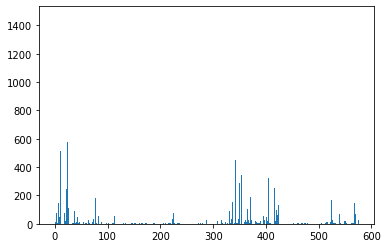

In [136]:

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
#-------------2.Mutual information Feature Selection-------------